<a href="https://colab.research.google.com/github/ljw-0108/bio-data-analysis/blob/main/%EC%8B%AC%EC%9E%A5%EC%A7%88%ED%99%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/md/heart.csv')

print("데이터셋 크기:", df.shape)
display(df.head(918))

데이터셋 크기: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



 결측치 개수
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 HeartDisease 분포 (0=정상, 1=질환)
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

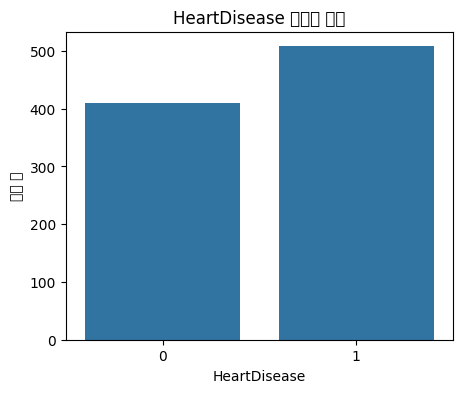

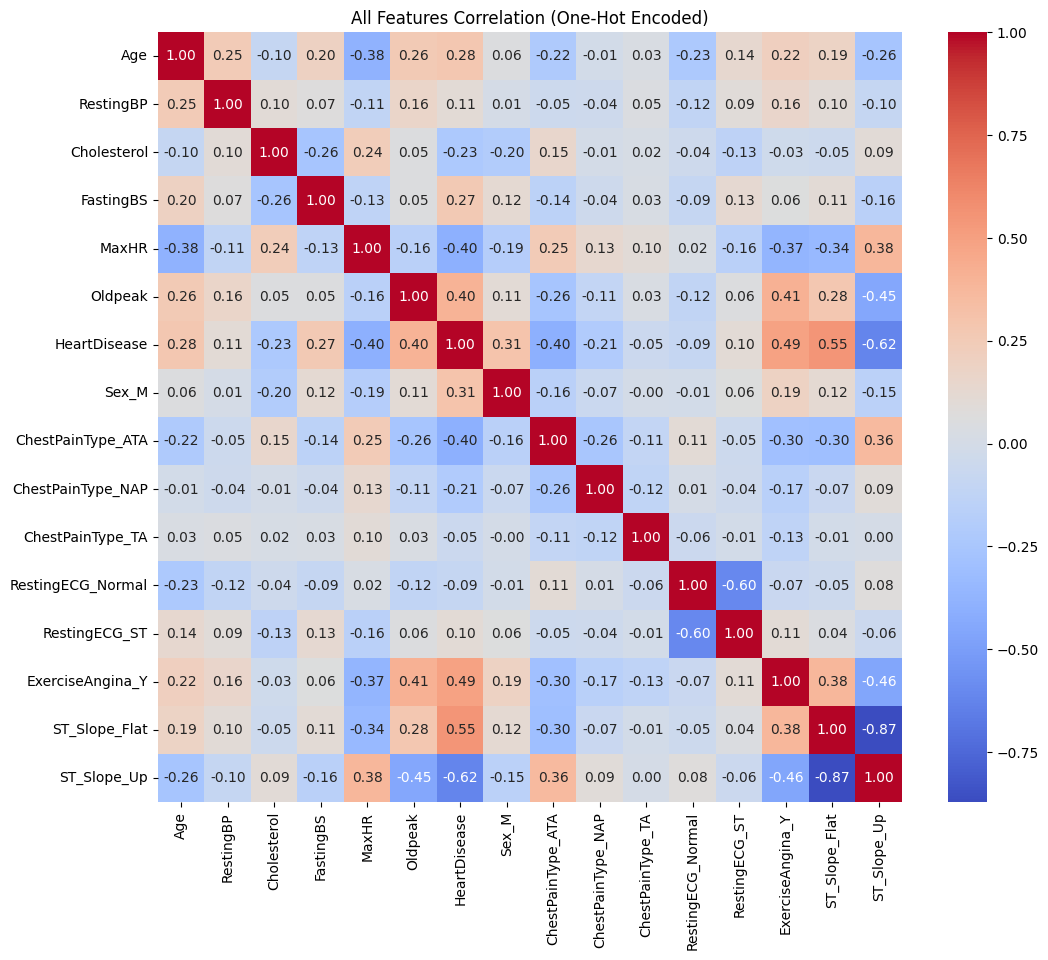

In [20]:
# 데이터 탐색 (EDA)
df.info()
display(df.describe())

# 결측치 확인
print("\n 결측치 개수")
print(df.isnull().sum())

# 타깃 분포
print("\n HeartDisease 분포 (0=정상, 1=질환)")
print(df['HeartDisease'].value_counts(normalize=True))
plt.figure(figsize=(5,4))
sns.countplot(x='HeartDisease', data=df)
plt.title('HeartDisease 클래스 분포')
plt.xlabel('HeartDisease')
plt.ylabel('샘플 수')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형을 dummy 변수로 변환
df_enc = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12,10))
sns.heatmap(df_enc.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('All Features Correlation (One-Hot Encoded)')
plt.show()

In [21]:
# 전처리 파이프라인 구축
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 피처/타깃 분리
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# 숫자형 / 범주형 컬럼 자동 구분
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

# 학습/검증 분할
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 파이프라인 정의
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


Numeric cols: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical cols: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# 로지스틱 회귀
pipe_lr = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])
pipe_lr.fit(X_train, y_train)
proba_lr = pipe_lr.predict_proba(X_val)[:,1]
print("LogisticRegression AUC:", roc_auc_score(y_val, proba_lr))

# 랜덤 포레스트
pipe_rf = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipe_rf.fit(X_train, y_train)
proba_rf = pipe_rf.predict_proba(X_val)[:,1]
print("RandomForest AUC:", roc_auc_score(y_val, proba_rf))

# 상세 리포트
pred_rf = pipe_rf.predict(X_val)
print("\n RandomForest Classification Report")
print(classification_report(y_val, pred_rf))


LogisticRegression AUC: 0.9299378287900525
RandomForest AUC: 0.9318507890961263

 RandomForest Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [23]:
#  하이퍼파라미터 튜닝

from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth':    [None, 5, 10]
}
gs = GridSearchCV(
    Pipeline([('pre', preprocessor),
              ('clf', RandomForestClassifier(random_state=42))]),
    param_grid, cv=3, scoring='roc_auc', n_jobs=-1
)
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Best CV AUC:", gs.best_score_)


Best params: {'clf__max_depth': 5, 'clf__n_estimators': 200}
Best CV AUC: 0.9331759763492089


In [24]:
#  딥러닝 모델링
import tensorflow as tf
from tensorflow.keras import layers, models

# 전처리 후 NumPy 배열 변환
X_train_np = preprocessor.fit_transform(X_train)
X_val_np   = preprocessor.transform(X_val)

# 모델 정의
dl_model = models.Sequential([
    layers.Input(shape=(X_train_np.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)
dl_model.summary()

# 학습
history = dl_model.fit(
    X_train_np, y_train,
    validation_data=(X_val_np, y_val),
    epochs=30, batch_size=32
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - auc: 0.8454 - loss: 0.5747 - val_auc: 0.9071 - val_loss: 0.4572
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - auc: 0.8863 - loss: 0.4629 - val_auc: 0.9239 - val_loss: 0.3727
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.8913 - loss: 0.4148 - val_auc: 0.9312 - val_loss: 0.3382
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.9212 - loss: 0.3546 - val_auc: 0.9368 - val_loss: 0.3227
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.9299 - loss: 0.3379 - val_auc: 0.9355 - val_loss: 0.3181
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.9174 - loss: 0.3559 - val_auc: 0.9375 - val_loss: 0.3136
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.9334 - loss: 0.3212 - val_auc: 0.9374 - val_loss: 0.3121
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.9142 - loss: 0.3724 - val_auc: 0.9375 - val_loss: 0.3118
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.9326 - loss:

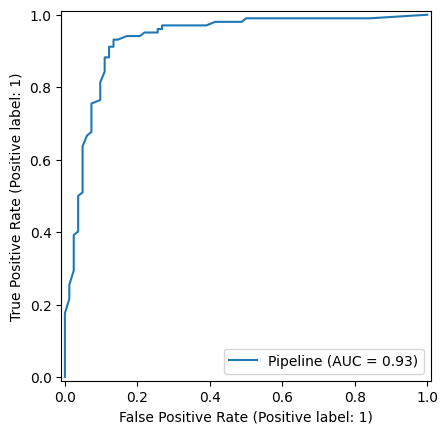

DL Model AUC: 0.939


In [25]:
# 모델 평가 및 시각화

from sklearn.metrics import RocCurveDisplay

# ML 모델 ROC
RocCurveDisplay.from_estimator(pipe_rf, X_val, y_val)
plt.show()

# DL 모델 AUC
loss, auc = dl_model.evaluate(X_val_np, y_val, verbose=0)
print(f"DL Model AUC: {auc:.3f}")
